## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.2,0.3,0.4,0.5]
Optimizer = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM), 
             keras.optimizers.Adam()]

In [7]:
results = {}
for opt, dropout in itertools.product(Optimizer,Dropout_EXP):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Dropout= %.2f" % dropout)
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=dropout)
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc  = model.history.history["accuracy"]
    valid_acc  = model.history.history["val_accuracy"]
    
    dropout_tag = "%s-%s" % (str(opt),str(dropout))
    results[dropout_tag] = {'train-loss': train_loss,'valid-loss': valid_loss,
                            'train-acc': train_acc,'valid-acc': valid_acc}

Dropout= 0.20
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)     

50000/50000 [==============================] - 2s 42us/step - loss: 1.3124 - accuracy: 0.5320 - val_loss: 1.3398 - val_accuracy: 0.5211
Epoch 45/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.3035 - accuracy: 0.5305 - val_loss: 1.3278 - val_accuracy: 0.5218
Epoch 46/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.2991 - accuracy: 0.5359 - val_loss: 1.3182 - val_accuracy: 0.5337
Epoch 47/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.2944 - accuracy: 0.5352 - val_loss: 1.3205 - val_accuracy: 0.5278
Epoch 48/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.2850 - accuracy: 0.5389 - val_loss: 1.3223 - val_accuracy: 0.5256
Epoch 49/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.2748 - accuracy: 0.5410 - val_loss: 1.3230 - val_accuracy: 0.5249
Epoch 50/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.2683 - accuracy: 0.5453 - val_loss: 1.3152

Epoch 38/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.4789 - accuracy: 0.4745 - val_loss: 1.4027 - val_accuracy: 0.4967
Epoch 39/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.4722 - accuracy: 0.4717 - val_loss: 1.4119 - val_accuracy: 0.4944
Epoch 40/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.4651 - accuracy: 0.4731 - val_loss: 1.4049 - val_accuracy: 0.4959
Epoch 41/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.4600 - accuracy: 0.4777 - val_loss: 1.3959 - val_accuracy: 0.4986
Epoch 42/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.4564 - accuracy: 0.4772 - val_loss: 1.3971 - val_accuracy: 0.4982
Epoch 43/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.4465 - accuracy: 0.4780 - val_loss: 1.3835 - val_accuracy: 0.5036
Epoch 44/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.4398 - accuracy: 0.4841 - val_

50000/50000 [==============================] - 2s 42us/step - loss: 1.6552 - accuracy: 0.4039 - val_loss: 1.5468 - val_accuracy: 0.4477
Epoch 32/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.6513 - accuracy: 0.4069 - val_loss: 1.5235 - val_accuracy: 0.4574
Epoch 33/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.6454 - accuracy: 0.4062 - val_loss: 1.5264 - val_accuracy: 0.4563
Epoch 34/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.6389 - accuracy: 0.4098 - val_loss: 1.5187 - val_accuracy: 0.4555
Epoch 35/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.6313 - accuracy: 0.4138 - val_loss: 1.5040 - val_accuracy: 0.4667
Epoch 36/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.6223 - accuracy: 0.4148 - val_loss: 1.5055 - val_accuracy: 0.4566
Epoch 37/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.6212 - accuracy: 0.4162 - val_loss: 1.4937

Epoch 25/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.8706 - accuracy: 0.2954 - val_loss: 1.7899 - val_accuracy: 0.3372
Epoch 26/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.8696 - accuracy: 0.2955 - val_loss: 1.7803 - val_accuracy: 0.3447
Epoch 27/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.8619 - accuracy: 0.3001 - val_loss: 1.7620 - val_accuracy: 0.3535
Epoch 28/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.8562 - accuracy: 0.3059 - val_loss: 1.7630 - val_accuracy: 0.3470
Epoch 29/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.8501 - accuracy: 0.3099 - val_loss: 1.7687 - val_accuracy: 0.3440
Epoch 30/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.8438 - accuracy: 0.3132 - val_loss: 1.7527 - val_accuracy: 0.3458
Epoch 31/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.8374 - accuracy: 0.3140 - val_

50000/50000 [==============================] - 2s 44us/step - loss: 1.5692 - accuracy: 0.4361 - val_loss: 1.5053 - val_accuracy: 0.4633
Epoch 19/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.5570 - accuracy: 0.4405 - val_loss: 1.5124 - val_accuracy: 0.4655
Epoch 20/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.5477 - accuracy: 0.4447 - val_loss: 1.5161 - val_accuracy: 0.4624
Epoch 21/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.5437 - accuracy: 0.4457 - val_loss: 1.5070 - val_accuracy: 0.4677
Epoch 22/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.5363 - accuracy: 0.4484 - val_loss: 1.4842 - val_accuracy: 0.4660
Epoch 23/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.5255 - accuracy: 0.4501 - val_loss: 1.4604 - val_accuracy: 0.4763
Epoch 24/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.5240 - accuracy: 0.4528 - val_loss: 1.4753

Epoch 12/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.8249 - accuracy: 0.3263 - val_loss: 1.7742 - val_accuracy: 0.3877
Epoch 13/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.8108 - accuracy: 0.3350 - val_loss: 1.7492 - val_accuracy: 0.3789
Epoch 14/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.8056 - accuracy: 0.3385 - val_loss: 1.7397 - val_accuracy: 0.3858
Epoch 15/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.8043 - accuracy: 0.3371 - val_loss: 1.7625 - val_accuracy: 0.3836
Epoch 16/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.7870 - accuracy: 0.3475 - val_loss: 1.7400 - val_accuracy: 0.3855
Epoch 17/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.7764 - accuracy: 0.3489 - val_loss: 1.7165 - val_accuracy: 0.3933
Epoch 18/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.7730 - accuracy: 0.3530 - val_

50000/50000 [==============================] - 2s 44us/step - loss: 2.0384 - accuracy: 0.2109 - val_loss: 1.9948 - val_accuracy: 0.2569
Epoch 6/50
50000/50000 [==============================] - 2s 44us/step - loss: 2.0136 - accuracy: 0.2282 - val_loss: 1.9826 - val_accuracy: 0.2532
Epoch 7/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.9932 - accuracy: 0.2385 - val_loss: 1.9630 - val_accuracy: 0.2703
Epoch 8/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.9800 - accuracy: 0.2441 - val_loss: 1.9636 - val_accuracy: 0.2712
Epoch 9/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.9714 - accuracy: 0.2471 - val_loss: 1.9529 - val_accuracy: 0.2684
Epoch 10/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.9666 - accuracy: 0.2508 - val_loss: 1.9439 - val_accuracy: 0.2694
Epoch 11/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.9533 - accuracy: 0.2616 - val_loss: 1.9359 - v

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 48us/step - loss: 2.2984 - accuracy: 0.1414 - val_loss: 2.2082 - val_accuracy: 0.1534
Epoch 2/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.1824 - accuracy: 0.1602 - val_loss: 2.2087 - val_accuracy: 0.1489
Epoch 3/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.1449 - accuracy: 0.1696 - val_loss: 2.1952 - val_accuracy: 0.1318
Epoch 4/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.1285 - accuracy: 0.1729 - val_loss: 2.2215 - val_accuracy: 0.1263
Epoch 5/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.1227 - accuracy: 0.1753 - val_loss: 2.2344 - val_accuracy: 0.1308
Epoch 6/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.1092 - accuracy: 0.1770 - val_loss: 2.1809 - val_accuracy: 0.1471
Epoch 7/50
50000/50000 [==============================] - 2s 43us/st

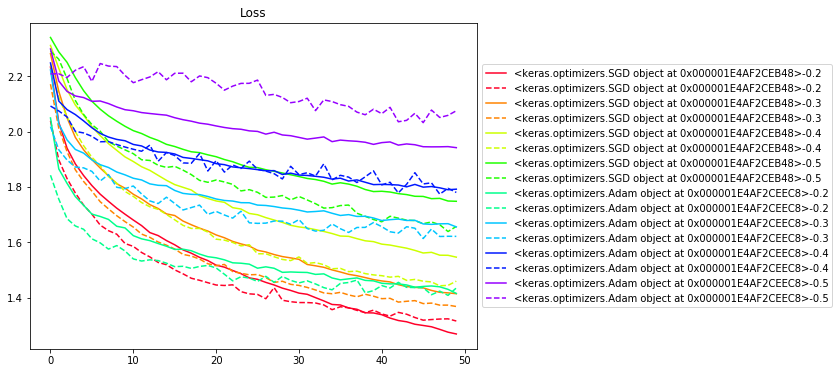

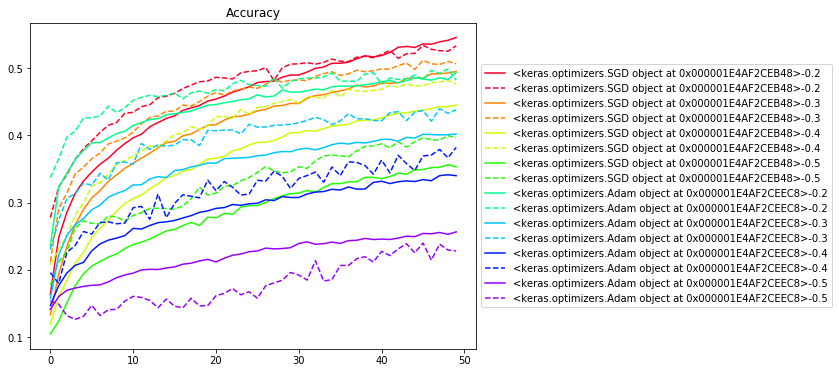

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline 
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Matplotlib 中如何將圖例放置在繪圖之外:  
https://www.delftstack.com/zh-tw/howto/matplotlib/how-to-place-legend-outside-of-the-plot-in-matplotlib/  